In [413]:
from __future__ import print_function, division

In [414]:
import pandas as pd
import numpy as np
import datetime
import seaborn
import matplotlib.pyplot as plt
import pickle
from IPython.display import Image

%matplotlib inline

In [415]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [170603, 170527, 160604, 160528, 150606, 150530]
turnstiles_df = get_data(week_nums)

with open('coord_data.pkl', 'rb') as f:
        coord_data = pickle.load(f)
        
dfp = turnstiles_df.merge(coord_data, on=['STATION'])

In [416]:
turnstiles_df = dfp

In [417]:
turnstiles_df.columns = [column.strip() for column in df.columns]

ValueError: Length mismatch: Expected axis has 13 elements, new values have 17 elements

In [ ]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

turnstiles_df = turnstiles_df.sort_values("DATE_TIME", ascending = True)
turnstiles_df

In [ ]:
turnstiles_df['DAYOFWEEK'] = turnstiles_df['DATE_TIME'].dt.dayofweek

df = turnstiles_df.sort_values(by=['DATE_TIME']).groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME', 'DATE', 'TIME', 'DAYOFWEEK'], as_index = False).ENTRIES.max()

entrydf = df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'], as_index = False).ENTRIES.max()

entrydf['DAILY'] = df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'], as_index = False).ENTRIES.max()['ENTRIES'] - df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'], as_index = False).ENTRIES.min()['ENTRIES']

entrydf = entrydf.drop(['ENTRIES'], axis = 1)

In [ ]:
df = pd.merge(df, entrydf, on=['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])
df

In [ ]:
dfshift = df.shift(1)

In [ ]:
df['PREVDT'] = dfshift['DATE_TIME']
df['PREVENT'] = dfshift['ENTRIES']
df['PREVTIME'] = dfshift['TIME']
df['ENTRIESDIFF'] = df['ENTRIES'] - df['PREVENT']
df['TIMEDIFF'] = df['DATE_TIME'] - df['PREVDT']
df['ENTRYPROP'] = df['ENTRIESDIFF']/df['DAILY']

df

In [ ]:
df = df.drop(df.index[0])

In [ ]:
df = df[(df['TIMEDIFF'] >= '3 hours') & (df['TIMEDIFF'] <= '5 hours')]

df.shape

In [ ]:
# TIME DIFFERENCES
# KEEP THIS

t=df.groupby('TIMEDIFF')['ENTRIES'].count().reset_index().sort_values('ENTRIES', ascending = False)
t.head(10)

In [ ]:
# get the 6 4-hour blocks
df.loc[(df['PREVTIME'] >= '00:00:00') & (df['TIME'] <= '06:00:00'), 'TIMEBLOCK'] = 'block1'
df.loc[(df['PREVTIME'] >= '04:00:00') & (df['TIME'] <= '10:00:00'), 'TIMEBLOCK'] = 'block2'
df.loc[(df['PREVTIME'] >= '08:00:00') & (df['TIME'] <= '14:00:00'), 'TIMEBLOCK'] = 'block3'
df.loc[(df['PREVTIME'] >= '12:00:00') & (df['TIME'] <= '18:00:00'), 'TIMEBLOCK'] = 'block4'
df.loc[(df['PREVTIME'] >= '16:00:00') & (df['TIME'] <= '22:00:00'), 'TIMEBLOCK'] = 'block5'
df.loc[(df['PREVTIME'] >= '20:00:00') & (df['TIME'] <= '02:00:00'), 'TIMEBLOCK'] = 'block6'

df

In [ ]:
df[df['TIMEBLOCK'].isnull()]

In [447]:
df.shape

(98544, 17)

In [429]:
df.sort_values('ENTRIESDIFF', ascending = False)

,C/A,UNIT,SCP,STATION,DATE_TIME,DATE,TIME,DAYOFWEEK,ENTRIES,DAILY,PREVDT,PREVENT,PREVTIME,ENTRIESDIFF,TIMEDIFF,ENTRYPROP,TIMEBLOCK
13465,A037,R170,05-00-00,14 ST-UNION SQ,2017-05-25 17:00:00,05/25/2017,17:00:00,3,589824,588132,2017-05-25 13:00:00,1.921000e+03,13:00:00,5.879030e+05,04:00:00,0.999611,block4
96617,R238,R046,00-03-02,GRD CNTRL-42 ST,2017-05-22 20:00:00,05/22/2017,20:00:00,0,28718908,7718,2017-05-22 16:00:00,2.871472e+07,16:00:00,4.193000e+03,04:00:00,0.543275,block5
96623,R238,R046,00-03-02,GRD CNTRL-42 ST,2017-05-23 20:00:00,05/23/2017,20:00:00,1,28729423,8658,2017-05-23 16:00:00,2.872525e+07,16:00:00,4.173000e+03,04:00:00,0.481982,block5
96629,R238,R046,00-03-02,GRD CNTRL-42 ST,2017-05-24 20:00:00,05/24/2017,20:00:00,2,28740872,9764,2017-05-24 16:00:00,2.873682e+07,16:00:00,4.051000e+03,04:00:00,0.414891,block5
96664,R238,R046,00-03-02,GRD CNTRL-42 ST,2017-05-30 20:00:00,05/30/2017,20:00:00,1,28777577,7804,2017-05-30 16:00:00,2.877356e+07,16:00:00,4.021000e+03,04:00:00,0.515249,block5
96670,R238,R046,00-03-02,GRD CNTRL-42 ST,2017-05-31 20:00:00,05/31/2017,20:00:00,2,28786144,7886,2017-05-31 16:00:00,2.878224e+07,16:00:00,3.906000e+03,04:00:00,0.495308,block5
96635,R238,R046,00-03-02,GRD CNTRL-42 ST,2017-05-25 20:00:00,05/25/2017,20:00:00,3,28749882,6978,2017-05-25 16:00:00,2.874604e+07,16:00:00,3.840000e+03,04:00:00,0.550301,block5
96263,R238,R046,00-03-00,GRD CNTRL-42 ST,2017-05-22 20:00:00,05/22/2017,20:00:00,0,13570665,6011,2017-05-22 16:00:00,1.356689e+07,16:00:00,3.775000e+03,04:00:00,0.628015,block5
96365,R238,R046,00-03-01,GRD CNTRL-42 ST,2016-05-25 20:00:00,05/25/2016,20:00:00,2,12604687,6512,2016-05-25 16:00:00,1.260092e+07,16:00:00,3.768000e+03,04:00:00,0.578624,block5
96269,R238,R046,00-03-00,GRD CNTRL-42 ST,2017-05-23 20:00:00,05/23/2017,20:00:00,1,13578318,6371,2017-05-23 16:00:00,1.357469e+07,16:00:00,3.627000e+03,04:00:00,0.569298,block5


In [479]:
dropkey = ((df["C/A"] == "A037") & 
(df["UNIT"] == "R170") & 
(df["SCP"] == "05-00-00") & 
(df["STATION"] == "14 ST-UNION SQ") &
(df["DATE"] == "05/25/2017"))

dropkey2 = ((df["C/A"] == "R238A") & 
(df["UNIT"] == "R046") & 
(df["SCP"] == "02-00-03") & 
(df["STATION"] == "GRD CNTRL-42 ST") &
(df["DATE"] == "05/23/2016"))

dropkey3 = (
    (df["C/A"] == "R241A") & 
    (df["UNIT"] == "R048") & 
    (df["SCP"] == "00-00-00") & 
    (df["STATION"] == "GRD CNTRL-42 ST") &
    ((df["DATE"] == "05/24/2017") ^ (df["DATE"] == "05/23/2017") ^ (df["DATE"] == "05/30/2017") ^ (df["DATE"] == "05/22/2017") ^ (df["DATE"] == "05/25/2017") ^ (df["DATE"] == "05/31/2017")))


droplist = df[dropkey].index.tolist()

droplist = droplist + df[dropkey2].index.tolist() + df[dropkey3].index.tolist()

In [480]:
df1 = df.drop(droplist)

df1.shape

(98496, 17)

In [494]:
df1 = df1[(df1['DAYOFWEEK'] != 5) & (df1['DAYOFWEEK'] != 6)]

In [485]:
t=df.groupby('ENTRIESDIFF')['C/A'].count().reset_index().sort_values('C/A', ascending = False)
t.tail(1)

,ENTRIESDIFF,C/A
2967,587903.0,1


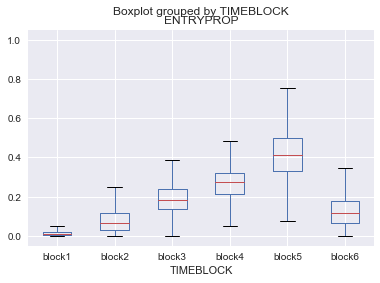

In [493]:
bdf = df1[(df1['ENTRYPROP'] >= 0) & (df1['ENTRYPROP'] <= 1)]

bdf.boxplot('ENTRYPROP', by='TIMEBLOCK')

In [524]:
df2 = df1[(df1['TIMEBLOCK'] == 'block4') ^ (df1['TIMEBLOCK'] == 'block5')].sort_values('ENTRIESDIFF', ascending = False)

money = df2.groupby(['TIMEBLOCK', 'STATION'], as_index = False).ENTRIESDIFF.sum()

money

,TIMEBLOCK,STATION,ENTRIESDIFF
0,block4,14 ST,371462.0
1,block4,14 ST-UNION SQ,848125.0
2,block4,18 ST,62468.0
3,block4,23 ST,673307.0
4,block4,28 ST,361912.0
5,block4,3 AV,27322.0
6,block4,33 ST,253973.0
7,block4,34 ST-HERALD SQ,678881.0
8,block4,34 ST-PENN STA,932669.0
9,block4,6 AV,2006.0


In [ ]:
plt.bar(money)

In [520]:
t=df2.groupby('STATION')['C/A'].count().reset_index().sort_values('C/A', ascending = False)
t.tail(10)

,STATION,C/A
3,23 ST,3567
7,34 ST-HERALD SQ,3210
10,GRD CNTRL-42 ST,2374
1,14 ST-UNION SQ,2273
0,14 ST,2187
4,28 ST,2032
6,33 ST,1310
2,18 ST,479
5,3 AV,240
9,6 AV,200
